In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline


#import data to a pandas dataframe
data = pd.read_csv(r'C:\Users\nadia\OneDrive\Desktop\Ergasia3_site_adaptation\11_Tataouine_COMP_COR_2011_2012.txt')

data.head(10)

,date,decimal_year,Julian_Day,Year,GHIraw,GHIobs
0,2011-01-01,2011.000000,1,2011,4.078908,3.5793
1,2011-01-03,2011.005479,3,2011,4.042998,3.6207
2,2011-01-04,2011.008219,4,2011,4.109243,3.3776
3,2011-01-05,2011.010959,5,2011,4.050934,3.7337
4,2011-01-06,2011.013699,6,2011,4.165805,3.6941
5,2011-01-07,2011.016438,7,2011,4.044454,3.7267
6,2011-01-08,2011.019178,8,2011,4.238506,3.8141
7,2011-01-10,2011.024658,10,2011,4.258729,3.8771
8,2011-01-15,2011.038356,15,2011,4.436503,3.9293
9,2011-01-16,2011.041096,16,2011,4.348210,3.9783


# FUNCTIONS

In [114]:
# scatter plot function 
def scatter(raw,obs,z):
    
    plt.figure(figsize=(10,10))
    plt.plot(obs,raw,"o",color=z,markersize=5)
    plt.plot([3,10],[3,10],color='black', markersize=0.05, linestyle='--', label = "y=x")
    plt.xlabel("obs GHI (Wm^(-2))")
    plt.ylabel("mod GHI (Wm^(-2))")
    plt.ylim(bottom=min(raw), top=max(raw))
    plt.xlim(left=min(obs), right=max(obs))
    
    model = LinearRegression().fit(raw.values.reshape(-1,1), obs.values.reshape((-1, 1)))
    yn = (model.coef_[0][0])*obs + (model.intercept_)
    plt.plot(obs, yn,'-', color= 'blue', label ="GHIraw = aGHIobs+b") #r
    plt.xlim(left=3, right=9)
    plt.ylim(bottom=3.5,top=10)
    plt.legend()
    
    print('*slope (a) is:', model.coef_)
    print("*intercept(b) is",model.intercept_)
    
    return (model.coef_,model.intercept_)

In [104]:
# MBE function 
def MBE(name,raw,obs):
    
    data[name]= obs-raw
    sum_ = data[name].sum()
    n = len(data[name])
    MBE_= sum_ / n
    print("the MBE index is:",MBE_)
    
    return MBE_

In [105]:
# RMSE function
def RMSE(name,raw,obs):
    
    data[name] = (raw-obs)**2
    sum_=data[name].sum()
    n = len(data[name])
    RMSE_=(sum_/n)**0.5
    print("the RMSE index is:", RMSE_)
    
    return RMSE_

In [106]:
# R function
def R(raw, obs):
    
    n=len(raw)
    xmean = raw.sum()/n
    ymean = obs.sum()/n
    nu= ((raw-xmean)*(obs-ymean)).sum()
    den= (((raw-xmean)**2).sum() * ((obs-ymean)**2).sum())**0.5
    R_ = nu / den
    print("the R index is:", R_)
    
    return R_

# INITIAL DATA : visualization and errors

*slope (a) is: [[1.00316543]]
*intercept(b) is [0.57914836]
the MBE index is: -0.5997417725193658
the RMSE index is: 0.6907419954678016
the R index is: 0.98039363927063


0.98039363927063

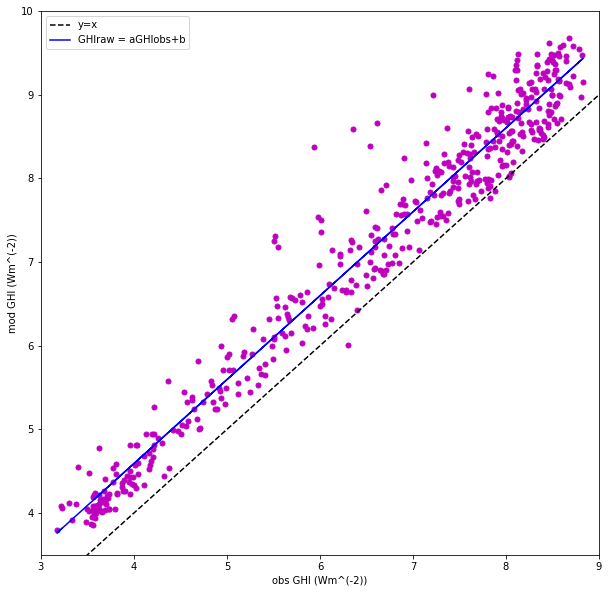

In [111]:
p1,p11 = scatter(data['GHIraw'],data['GHIobs'],'m')
MBE('initial',data['GHIraw'],data['GHIobs'])
RMSE('initial2',data['GHIraw'],data['GHIobs'])
R(data['GHIraw'],data['GHIobs'])

# Corrected data

In [112]:
#correcting the satellite data
GHIcor = data['GHIraw'] - ((p1[0][0] - 1)*data['GHIobs'] +  p11)

*slope (a) is: [[1.]]
*intercept(b) is [-3.55271368e-15]
the MBE index is: 8.020520274867798e-16
the RMSE index is: 0.3426446747046756
the R index is: 0.9802729722919122


0.9802729722919122

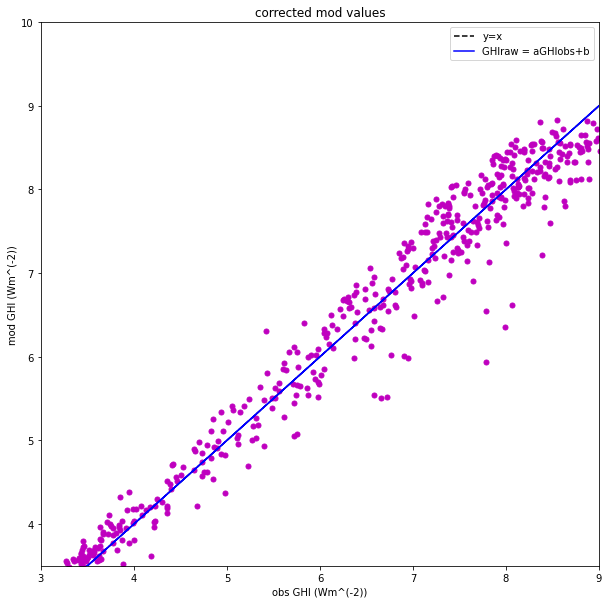

In [115]:
scatter(data['GHIobs'],GHIcor,'m')
plt.title('corrected mod values')
MBE('cor', GHIcor, data['GHIobs'])
RMSE('cor2',GHIcor,data['GHIobs'])
R(GHIcor,data['GHIobs'])